## Price optimisation to boost the revenue: 

In [3]:
# Importing necessary Python libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [123]:
df = pd.read_csv('Competition_Data.csv', index_col='Index')
df.head()

,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
Index,,,,,,,,
0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Fiscal_Week_ID            100000 non-null  object 
 1   Store_ID                  100000 non-null  object 
 2   Item_ID                   100000 non-null  object 
 3   Price                     100000 non-null  float64
 4   Item_Quantity             100000 non-null  int64  
 5   Sales_Amount_No_Discount  100000 non-null  float64
 6   Sales_Amount              100000 non-null  float64
 7   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 6.9+ MB


In [125]:
# Making sure there is no null values in our dataset 
df.isnull().any().any()

False

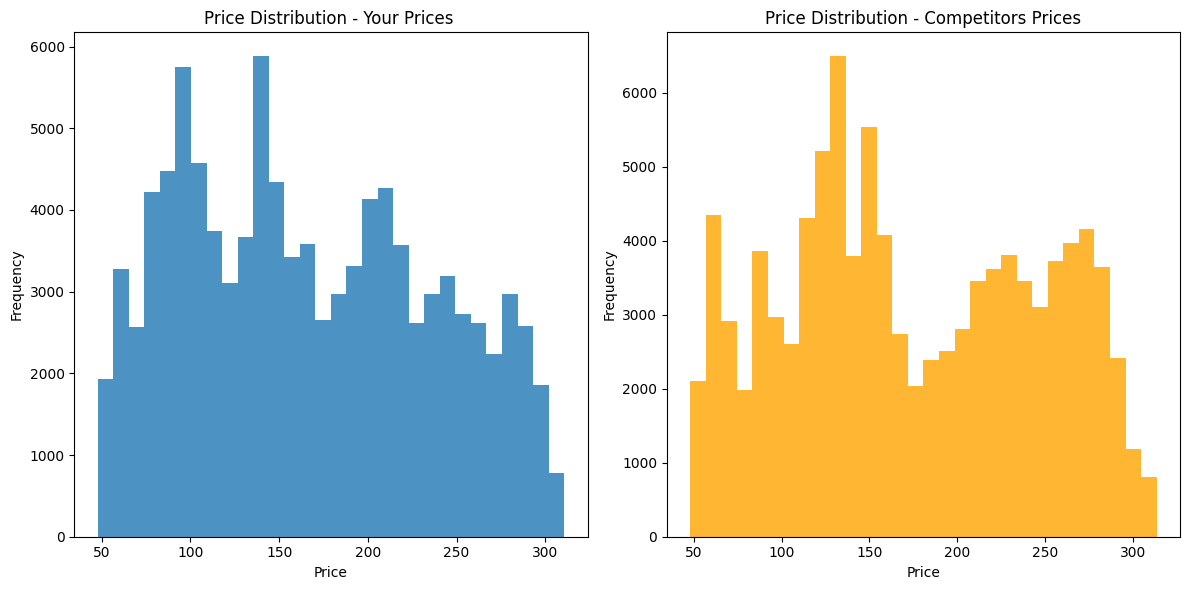

In [126]:
# Visualising price distribution compared to competitors:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=30, alpha=0.8, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Prices ')

plt.subplot(1, 2, 2)
plt.hist(df['Competition_Price'], bins=30, alpha=0.8, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competitors Prices')

plt.tight_layout()
plt.show()

This graph shows that the competition’s prices are generally higher, with peaks around the 100-150 and 200-250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store’s prices are more evenly distributed across the 50-300 range, with notable peaks around 100-150.

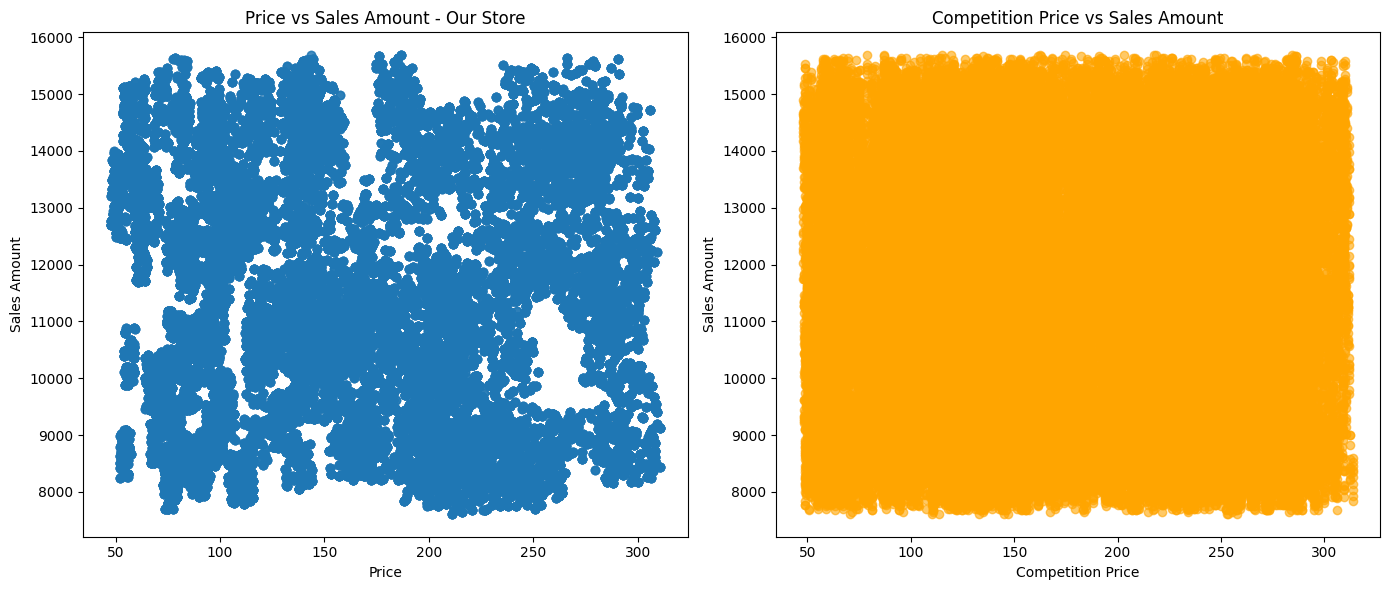

In [127]:
# Comparing the relationship between price and sales:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Price'], df['Sales_Amount'], alpha=0.6, label='Your Products')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(df['Competition_Price'], df['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

The scatter plots show the price versus sales amount for our store (left) and the competition (right). Our store’s plot exhibits a wide range of sales amounts with no clear trend, while the competition’s plot shows higher sales amounts clustered around higher prices and more consistent performance. This implies the competition may have a more effective pricing strategy.

In [128]:
# Comparing the price changes over time:
df['Fiscal_Week_ID'] = pd.to_datetime(df['Fiscal_Week_ID'] +'-1', format='%Y-%U-%w')

weekly_prices = df.groupby('Fiscal_Week_ID').agg({'Price': 'mean','Competition_Price': 'mean'}).reset_index()
weekly_prices.head()



,Fiscal_Week_ID,Price,Competition_Price
0,2019-03-18,166.352333,175.018236
1,2019-03-25,166.486184,173.169854
2,2019-04-01,169.865254,173.161543
3,2019-04-08,164.892479,174.914615
4,2019-04-15,167.455556,175.189035


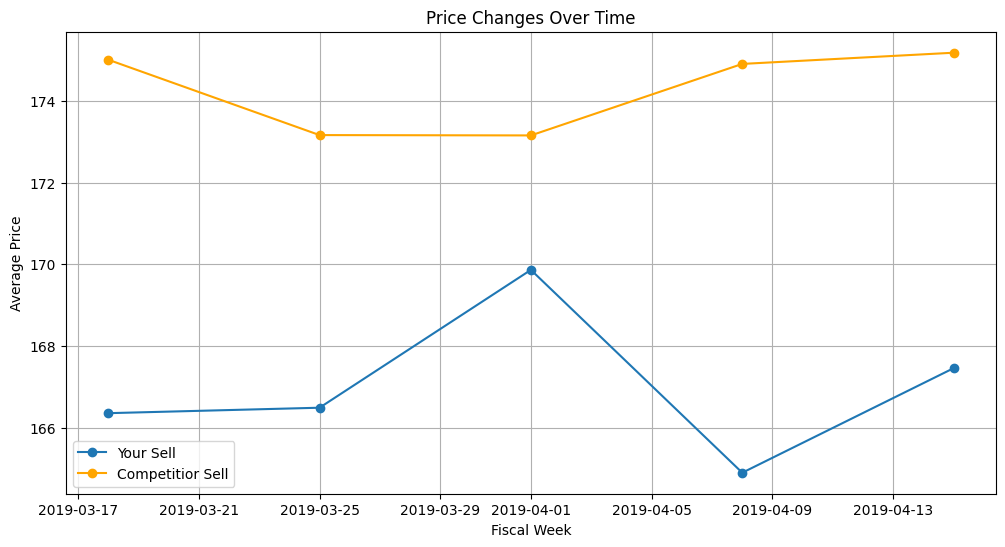

In [129]:
plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Your Sell', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competitior Sell', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

The competition consistently maintains higher average prices above 170 with a slight upward trend. In contrast, our store’s prices start around 166, fluctuate, and then rise again. This suggests the competition has a more stable pricing strategy, which may be contributing to their more consistent sales performance.

In [130]:
# Calculating price elasticity : 

df['price_change'] = df['Price'].pct_change()
df['qty_change'] = df['Item_Quantity'].pct_change()

df['elasticity'] = df['qty_change'] / df['price_change']

df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df.dropna(subset=['elasticity'], inplace=True)

df

,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity
Index,,,,,,,,,,,
10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147
20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520
30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086
40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389
50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661
...,...,...,...,...,...,...,...,...,...,...,...
99975,2019-04-15,store_458,item_743,98.89,353,2666.83,10299.90,52.93,-0.016607,-0.024862,1.497072
99980,2019-04-15,store_162,item_743,94.97,343,2472.23,9981.52,52.93,-0.039640,-0.028329,0.714647
99985,2019-04-15,store_30,item_743,92.61,364,2524.88,10346.17,52.93,-0.024850,0.061224,-2.463767


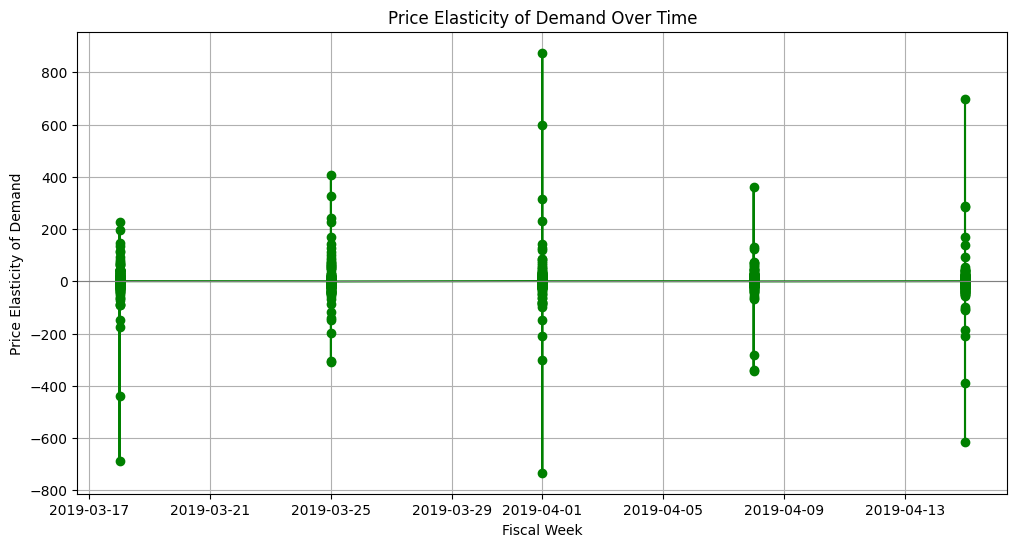

In [131]:
# Visualising the price elasticity: 

plt.figure(figsize=(12, 6))
plt.plot(df['Fiscal_Week_ID'], df['elasticity'], marker='o', linestyle='-', color='g')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

The graph shows the price elasticity of demand over time, revealing significant weekly fluctuations. Elasticity values vary widely, indicating that demand's sensitivity to price changes is inconsistent. High positive elasticity suggests demand sometimes rises with price increases, while high negative elasticity indicates sharp drops in demand with price hikes. This variability suggests that other factors, like promotions or seasonality, may also be influencing demand.

In [132]:
# comparing the total sales amounts for our stores and the competitor store:

total_sales = df['Sales_Amount'].sum()
compt_total_sale = (df['Item_Quantity']* df['Competition_Price']).sum()

total_num_sold  = df['Item_Quantity'].sum()
compt_total_num_sold = df['Item_Quantity'].sum()

compare_df = pd.DataFrame({'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Stores': [total_sales, total_num_sold],
    'Competitors stores': [compt_total_sale, compt_total_num_sold]
})

compare_df

,Metric,Your Stores,Competitors stores
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


Our store's total sales amount is 114,100,500, whereas the competitor's total sales amount is 696,209,700. The competition has a significantly higher total sales amount compared to our store, indicating that their pricing strategy is more effective in generating revenue.

In [133]:
# Sales Analysis by Price Brackets: 

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400']

# create price brackets for both your stores and competitors stores
df['price_bracket'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
df['competitors_price_bracket'] = pd.cut(df['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your stores
sales_by_bracket_your_stores = df.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_stores.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competitors
df['competition_sales_amt'] = df['Competition_Price'] * df['Item_Quantity']
sales_by_bracket_competitors = df.groupby('competitors_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competitors.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_stores, sales_by_bracket_competitors, on='Price Bracket')

sales_by_bracket

/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_72861/1003824131.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_stores = df.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
/var/folders/t8/b35g9qgj44lc2lk1cvtblc5w0000gp/T/ipykernel_72861/1003824131.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competitors = df.groupby('competitors_price_bracket')['competition_sales_amt'].sum().reset_index()


,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00


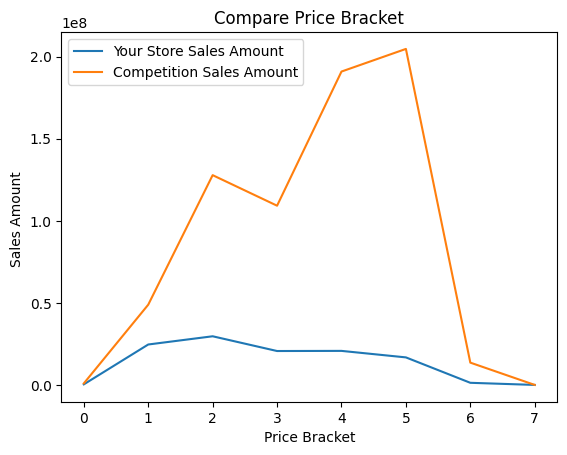

In [134]:
sales_by_bracket.plot()

plt.xlabel('Price Bracket')
plt.ylabel('Sales Amount ')
plt.title('Compare Price Bracket')
plt.legend()

plt.show()

* 0-50 Bracket: The competition's sales are notably higher.
* 51-100 Bracket: The competition significantly outperforms our store.
* 101-150 Bracket: The competition’s sales are substantially higher.
* 151-200 Bracket: The competition again shows significantly higher sales.
* 201-250 Bracket: The competition's sales are nearly double ours.
* 251-300 Bracket: The competition leads in sales, though the gap is narrower.
* 301-350 Bracket: The competition maintains higher sales, but the total is lower compared to other brackets.

In [135]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_IDs = df.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
df = pd.merge(df, item_IDs, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
df['segment'] = pd.cut(df['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = df['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = df[df['segment'] == segment].copy()  # Create a copy to avoid SettingWithCopyWarning
    segment_data.loc[:, 'price_change'] = segment_data['Price'].pct_change()
    segment_data.loc[:, 'qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data.loc[:, 'elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df


,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


Medium Segment: Price changes have minimal impact on demand. We can increase prices slightly to boost revenue with minimal loss in sales volume.

High Segment: Demand reacts strongly to price changes. We should carefully adjust prices to maximize revenue while maintaining sales volume.

In [137]:
df

,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competitors_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment
0,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium
1,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium
2,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium
3,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium
4,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,2019-04-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium
9987,2019-04-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium
9988,2019-04-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium
9989,2019-04-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium


In [138]:
# make a copy of the dataset 
dynamic_pricing = df.copy()

# apply dynamic pricing rules
dynamic_pricing.loc[dynamic_pricing['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing['Price'] * 1.05
dynamic_pricing.loc[dynamic_pricing['segment'] == 'High', 'dynamic_price'] = dynamic_pricing['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing['dynamic_sales_amt'] = dynamic_pricing['dynamic_price'] * dynamic_pricing['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = df['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = df['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metrics': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metrics,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue.

In [141]:
df['dynamic_price'] = dynamic_pricing['dynamic_price']
df[['Price', 'dynamic_price']].head()

,Price,dynamic_price
0,136.79,143.6295
1,138.67,145.6035
2,128.93,135.3765
3,134.45,141.1725
4,134.13,140.8365
